I will explore the application of decision trees in the context of regression.

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Let's load the data and conduct a preliminary analysis.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
fch = fetch_california_housing()

In [ ]:
data = pd.DataFrame(data=fch.data, columns=fch.feature_names)

In [ ]:
data["MedHouseVal"] = fch.target

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Let's split the dataset into training and testing subsets and train the regression model on the training set.

In [ ]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [ ]:
y = data['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

For the testing set, I will predict the target variable and compare it with the actual values by calculating the model's prediction accuracy.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.5757877060324508

I will train a decision tree on the training set and repeat the previous step. Then I'll visualize the decision tree.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn import tree

In [ ]:
model_tree = DecisionTreeRegressor()

In [ ]:
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree = model_tree.predict(X_test)

In [ ]:
model_tree.score(X_test, y_test)

0.6198125514589412

In [ ]:
from sklearn.tree import plot_tree

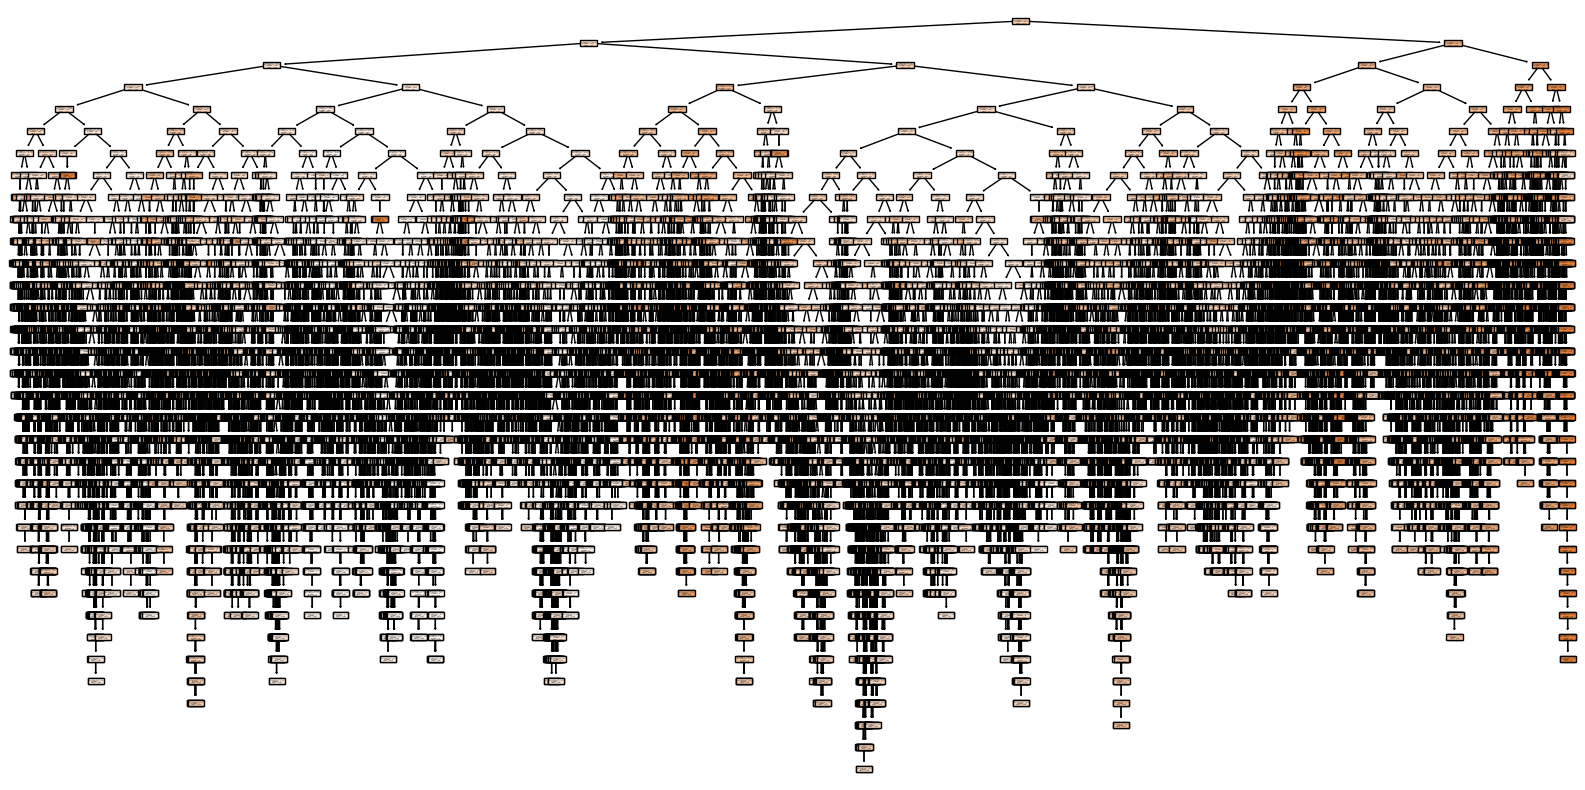

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_tree, filled=True, feature_names=data.columns)
plt.show()

The decision tree turned out to be unreadable, so I will optimize the tree depth and predict the target variable again. I will compare the predictions with the actual values and calculate the model's prediction accuracy.

In [ ]:
model_tree1 = DecisionTreeRegressor(max_depth=5)

In [ ]:
model_tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred_tree1 = model_tree1.predict(X_test)

In [ ]:
model_tree1.score(X_test, y_test)

0.5997321244428706

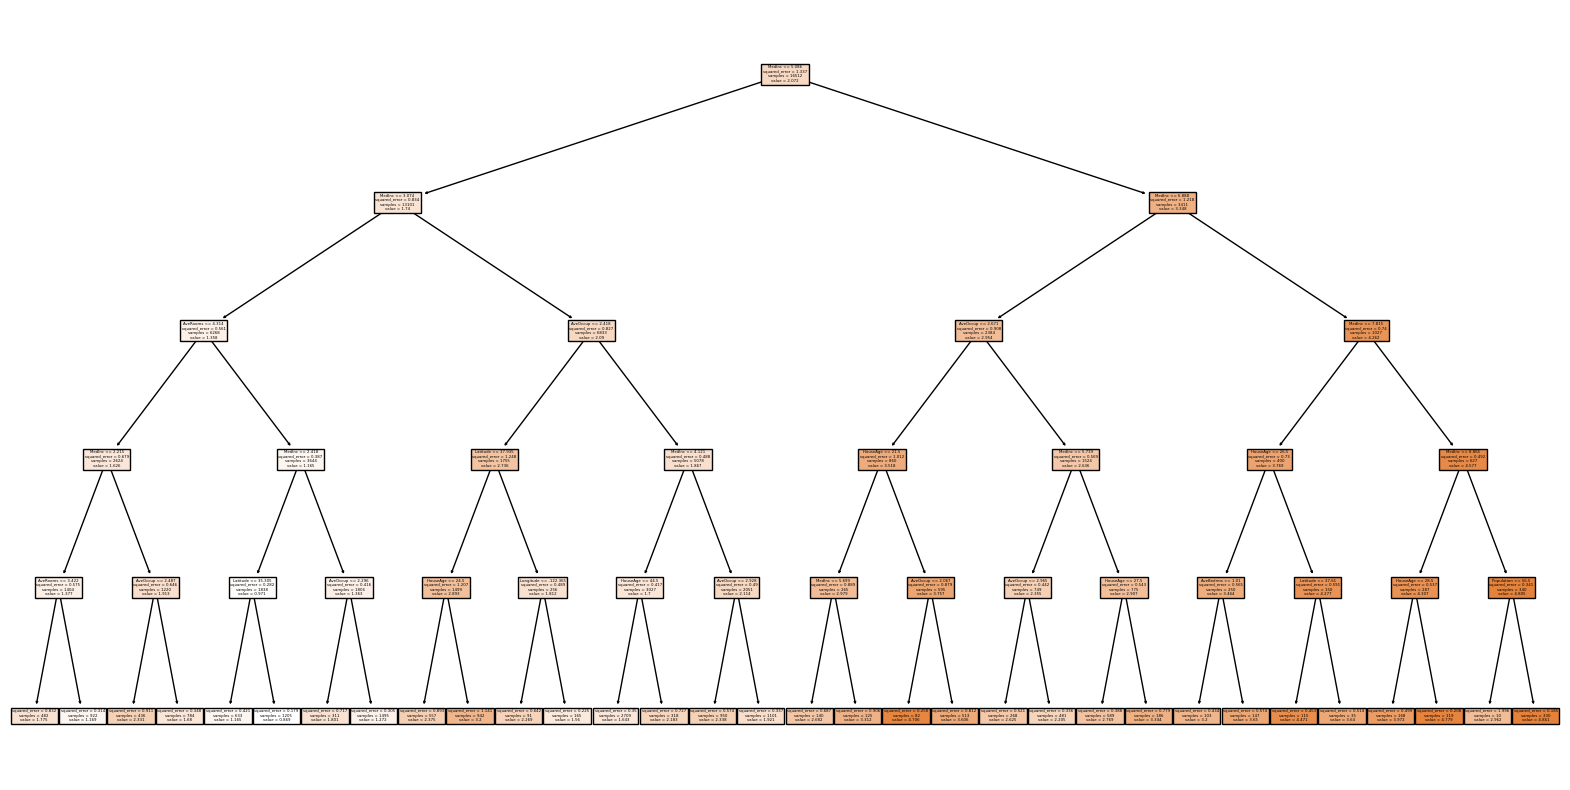

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_tree1, filled=True, feature_names=data.columns)
plt.show()

Two models were trained, and their accuracy was evaluated. One parameter of the decision tree was optimized. As you can see, after optimizing the tree depth, the model's accuracy decreased by two percent, which is still two percent better than the accuracy of the linear regression model.